In [1]:
import pandas as pd

df = pd.read_csv('MP_queried_data_featurized_w_additional_acr_ae_en.csv')

# Calculate the mean and standard deviation of the formation energy
formation_energy_mean = df['formation_energy_per_atom'].mean()
formation_energy_std = df['formation_energy_per_atom'].std()

# Define the upper and lower bounds
lower_bound = formation_energy_mean - 5 * formation_energy_std
upper_bound = formation_energy_mean + 5 * formation_energy_std

# Remove samples with formation energy outside of ±5σ 
train_data_filtered = df[(df['formation_energy_per_atom'] >= lower_bound) & (df['formation_energy_per_atom'] <= upper_bound)]

train_data_filtered.reset_index(drop=True, inplace=True)

C:\Users\Zyra\AppData\Local\Temp\ipykernel_32428\3665642337.py:3: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MP_queried_data_featurized_w_additional_acr_ae_en.csv')


In [2]:
def classify_stability(e_hull):
    if e_hull <= 0.025:        # stable compounds
        return "Stable"
    elif e_hull <= 0.100:      # experimentally accessible metastable phases
        return "Metastable"
    else:                      # highly unstable
        return "Unstable"

train_data_filtered["stability_label"] = train_data_filtered["energy_above_hull"].apply(classify_stability)

train_data_filtered

C:\Users\Zyra\AppData\Local\Temp\ipykernel_32428\2474391877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_filtered["stability_label"] = train_data_filtered["energy_above_hull"].apply(classify_stability)


,material_id,formula_pretty,crystal_system,symbol,number,point_group,symprec,version,uncorrected_energy_per_atom,energy_per_atom,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,mp-573369,Cs3Nd(MoO4)3,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-6.708421,-7.647894,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,mp-28967,Ba(PdS2)2,Monoclinic,P2_1/m,11,2/m,0.1,2.0.2,-15.913734,-5.242962,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,mp-2712904,Na7Ta3Zn(SiO4)6,Trigonal,P3,143,3,0.1,2.0.2,-7.331154,-7.733301,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,mp-1042447,TiZnBiO5,Orthorhombic,Pbca,61,mmm,0.1,2.0.2,-6.526640,-6.956015,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,mp-2715697,Na2YNb3Si4(SO12)2,Triclinic,P1,1,1,0.1,2.0.2,-7.610403,-8.068403,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153160,mp-22426,ScSiNi,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-11.616847,-6.710994,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153161,mp-1210929,MnAg2SnSe4,Orthorhombic,Pmn2_1,31,mm2,0.1,2.0.2,-4.397423,-4.633423,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153162,mp-741045,Na4AlP2HO9,Orthorhombic,Pbcm,57,mmm,0.1,2.0.2,-6.254027,-6.617733,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153163,mp-1209640,Tm4Ni,Cubic,Fd-3m,227,m-3m,0.1,2.0.2,-4.492395,-4.492395,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [3]:
columns_to_keep = ['material_id', 'formula_pretty', 'formation_energy_per_atom', 'energy_above_hull', 'crystal_system', 'number', 'symbol', 'point_group',
    'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
    'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
    'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
    'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
    'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
    'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
    'Es', 'Fm', 'Md', 'No', 'Lr', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
    'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range', 'stability_label'
]

# Keep only these columns
df_filtered = train_data_filtered[columns_to_keep].copy()
df_filtered

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,crystal_system,number,symbol,point_group,H,He,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,mp-573369,Cs3Nd(MoO4)3,-2.414818,0.000000,Orthorhombic,62,Pnma,mmm,0.000000,0.0,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,mp-28967,Ba(PdS2)2,-1.124079,0.000000,Monoclinic,11,P2_1/m,2/m,0.000000,0.0,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,mp-2712904,Na7Ta3Zn(SiO4)6,-2.912354,0.049678,Trigonal,143,P3,3,0.000000,0.0,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,mp-1042447,TiZnBiO5,-2.236384,0.077777,Orthorhombic,61,Pbca,mmm,0.000000,0.0,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,mp-2715697,Na2YNb3Si4(SO12)2,-2.837049,0.079832,Triclinic,1,P1,1,0.000000,0.0,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153160,mp-22426,ScSiNi,-0.865019,0.000000,Orthorhombic,62,Pnma,mmm,0.000000,0.0,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153161,mp-1210929,MnAg2SnSe4,-0.528284,0.000000,Orthorhombic,31,Pmn2_1,mm2,0.000000,0.0,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153162,mp-741045,Na4AlP2HO9,-2.623089,0.000000,Orthorhombic,57,Pbcm,mmm,0.058824,0.0,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153163,mp-1209640,Tm4Ni,0.249634,0.465763,Cubic,227,Fd-3m,m-3m,0.000000,0.0,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [4]:
df_lowest_energy = df_filtered.sort_values('formation_energy_per_atom').drop_duplicates(subset=['formula_pretty', 'number', 'stability_label'], keep='first')
df_lowest_energy

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,crystal_system,number,symbol,point_group,H,He,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
102698,mp-1518724,BaGdCrFeO6,-5.150986,0.000000,Cubic,216,F-43m,-43m,0.0,0.0,...,2.6220,3.44,0.89,2.55,98.10,1.080922,1.461113,0.14462,1.316493,Stable
88139,mp-905,LaF3,-4.510049,0.000000,Trigonal,165,P-3c1,-3m,0.0,0.0,...,3.2600,3.98,1.10,2.88,93.00,2.668392,3.401190,0.47000,2.931190,Stable
138384,mp-334,LaF3,-4.509148,0.000901,Hexagonal,185,P6_3cm,6mm,0.0,0.0,...,3.2600,3.98,1.10,2.88,93.00,2.668392,3.401190,0.47000,2.931190,Stable
60831,mp-11347,TbF3,-4.504523,0.000000,Orthorhombic,62,Pnma,mmm,0.0,0.0,...,3.9800,3.98,3.98,0.00,90.00,2.842142,3.401190,1.16500,2.236190,Stable
43647,mp-1212843,DyF3,-4.501402,0.000000,Orthorhombic,62,Pnma,mmm,0.0,0.0,...,3.2900,3.98,1.22,2.76,89.75,2.638892,3.401190,0.35200,3.049190,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106729,mp-1093928,TaMnRe2,4.532568,4.694659,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7125,1.90,1.50,0.40,131.75,0.207333,0.322000,0.15000,0.172000,Unstable
122454,mp-1097209,VReMo2,4.544091,4.713604,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.9625,2.16,1.63,0.53,135.25,0.542750,0.748000,0.15000,0.598000,Unstable
38685,mp-1097208,Ta2CrMo,4.545443,4.597545,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7050,2.16,1.50,0.66,138.00,0.514500,0.748000,0.32200,0.426000,Unstable
72913,mp-1097434,Nb2OsW,4.547295,4.757008,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7750,2.20,1.60,0.60,140.00,0.937768,1.100000,0.81626,0.283740,Unstable


In [5]:
import pandas as pd

def preprocess_material_data(df, fill_strategy="zero"):
    """
    Preprocess materials data for ML training.
    
    Steps:
    1. Keep only relevant columns.
    2. One-hot encode the space group number and stability label.
    3. Handle missing values.
    4. Return cleaned X and y.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe (raw data).
    fill_strategy : str, optional
        'zero' -> fill missing features with 0
        'mean' -> fill missing features with mean value

    Returns:
    --------
    X : pandas.DataFrame
        Cleaned and encoded features.
    y : pandas.Series
        Target values (formation_energy_per_atom).
    """

    columns_to_keep = ['formula_pretty', 'formation_energy_per_atom', 'energy_above_hull',
                       'crystal_system', 'number', 'symbol', 'point_group', 'stability_label',
                       'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
                       'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
                       'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
                       'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
                       'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
                       'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
                       'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
                       'Es', 'Fm', 'Md', 'No', 'Lr', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
                       'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range']

    # Keep only relevant columns
    df_filtered = df[columns_to_keep].copy()

    # Drop rows with missing target values
    df_filtered = df_filtered.dropna(subset=['formation_energy_per_atom'])

    # One-hot encode space group number and stability label
    df_encoded = pd.get_dummies(df_filtered, columns=["number", "stability_label"], prefix=["sg", "stab"])

    # Identify dummy columns
    dummy_cols = [col for col in df_encoded.columns if col.startswith("sg_") or col.startswith("stab_")]

    # Convert dummies to int
    df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

    # Define feature columns (elements + structure features + one-hot dummies)
    feature_cols = [
        'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
        'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
        'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
        'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
        'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
        'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
        'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
        'Es', 'Fm', 'Md', 'No', 'Lr', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
        'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range'
    ]

    all_feature_cols = feature_cols + dummy_cols

    # Fill missing feature values
    if fill_strategy == "zero":
        X = df_encoded[all_feature_cols].fillna(0)
    elif fill_strategy == "mean":
        X = df_encoded[all_feature_cols].fillna(df_encoded[all_feature_cols].mean())
    else:
        raise ValueError("fill_strategy must be either 'zero' or 'mean'")

    y = df_encoded['formation_energy_per_atom']

    return X, y


In [8]:
# Preprocess the dataset
X, y = preprocess_material_data(df_lowest_energy, fill_strategy="mean")

# Check results
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Any NaN in X?", X.isna().sum().sum())
print("Any NaN in y?", y.isna().sum())


X shape: (136569, 346)
y shape: (136569,)
Any NaN in X? 0
Any NaN in y? 0


Using device: cuda


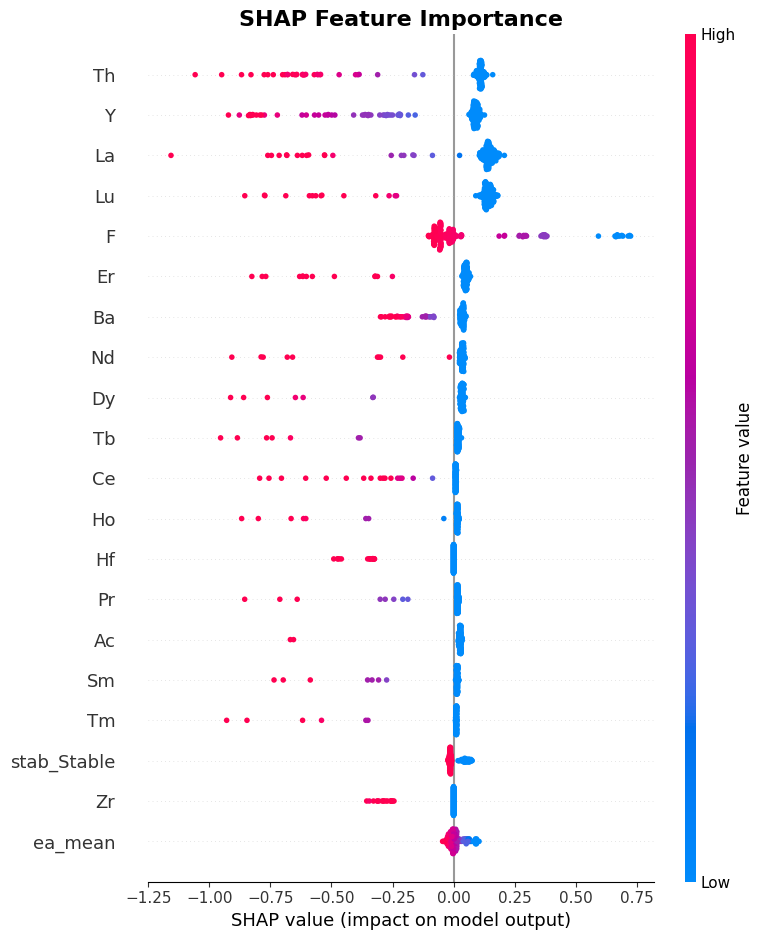

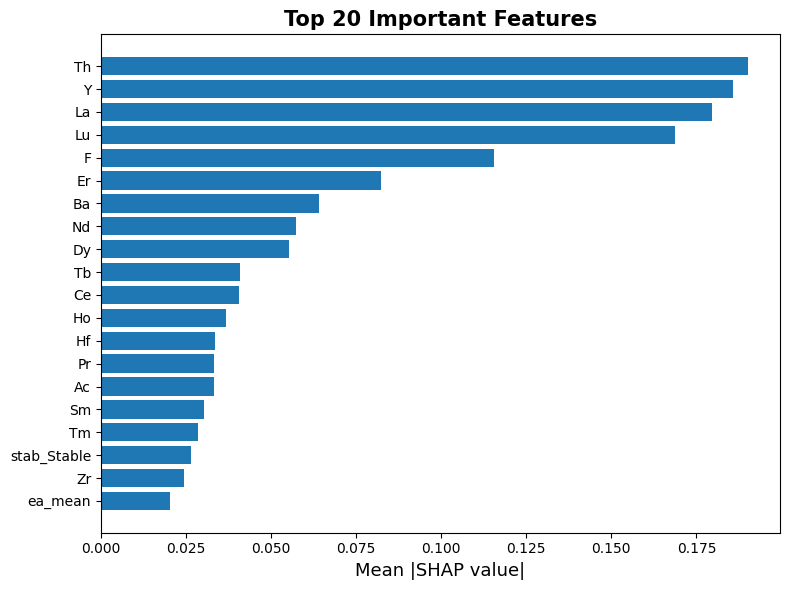

In [10]:
# ==========================================================
# 📊 SHAP Analysis for Feature Importance
# ==========================================================
import shap
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# ✅ Make sure you’re using the same model architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
    def forward(self, x):
        return self.layers(x)

# ==========================================================
# ⚙️ Load Model and Data
# ==========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load model weights
model = NeuralNetwork(X.shape[1], 1).to(device)
model.load_state_dict(torch.load("saved_models/best_model_overall2.pth", map_location=device))
model.eval()

# Convert X to torch tensor (same normalization as training)
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
X_tensor = (X_tensor - X_tensor.mean(dim=0)) / (X_tensor.std(dim=0) + 1e-8)

# ==========================================================
# 🔍 SHAP Computation
# ==========================================================
# Use only a subset for speed
subset = X_tensor[:200]  # you can adjust to 100–1000 depending on VRAM
background = subset[:50]  # background samples for SHAP baseline

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values
shap_values = explainer.shap_values(subset)

# Convert from list (if single output) and squeeze unnecessary dims
if isinstance(shap_values, list):
    shap_values = shap_values[0]
shap_values = np.squeeze(shap_values)

# Convert tensors to numpy
X_subset = subset.detach().cpu().numpy()

# ==========================================================
# 📈 SHAP Summary Plot
# ==========================================================
plt.title("SHAP Feature Importance", fontsize=16, fontweight="bold")
shap.summary_plot(shap_values, X_subset, feature_names=X.columns, show=True)

# ==========================================================
# 📉 Mean Absolute SHAP Value Bar Plot (Optional)
# ==========================================================
# This part shows which features are *globally* most important.
mean_abs_shap = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(mean_abs_shap)[::-1]
top_features = 20  # top N features to display

plt.figure(figsize=(8, 6))
plt.barh(np.array(X.columns)[sorted_idx[:top_features]][::-1],
         mean_abs_shap[sorted_idx[:top_features]][::-1])
plt.xlabel("Mean |SHAP value|", fontsize=13)
plt.title(f"Top {top_features} Important Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Compute mean absolute SHAP importance for all features
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    "Feature": X.columns,
    "Mean_|SHAP|": mean_abs_shap
}).sort_values("Mean_|SHAP|", ascending=False)

# Save to CSV
shap_importance.to_csv("shap_feature_importance.csv", index=False)
print("✅ Saved SHAP feature importance to shap_feature_importance.csv")

# Display top 10
print(shap_importance.head(10))


✅ Saved SHAP feature importance to shap_feature_importance.csv
   Feature  Mean_|SHAP|
89      Th     0.190066
38       Y     0.185640
56      La     0.179606
70      Lu     0.168714
8        F     0.115463
67      Er     0.082177
55      Ba     0.064223
59      Nd     0.057286
65      Dy     0.055132
64      Tb     0.040932
